# Neuromodulation dopamine - replay (single neuromodulator)

To simulate single neuromodulator in Snudda, firstly, the parameters from Neuromodcell have to been saved in modulations.json and placed in the model dircetory. 


To install snudda, follow the instructions at https://github.com/Hjorthmedh/Snudda/wiki/1.-User-installation

Following installation, the code below will set up the network and the neuromodulatory modulation.


To set the $DATA parameter for snudda, 

In [1]:
import os
os.environ["SNUDDA_DATA"] = 'data'

This should be set to the directory where neurons, synapses and other parameters for the network have been placed. Look at the 'data' directory for referenece

Set the directory for where the neurons for the striatum (in this example) are saved

In [2]:
neurons_dir = os.path.abspath('data/neurons/')

We wrote a specific neuromodulation init (based on snuddas init.py), to load the synapses which have had the modulation parameters included into the parameter sets.

In [3]:
from neuromodulationInit import neuromodulationInit
import os

network_path = 'dopamine-trial-network'
config_name= os.path.join(network_path,"network-config.json")
cnc = neuromodulationInit(config_file=config_name,random_seed=12345)

cnc.define_striatum_neuromodulation(num_dSPN=10,num_iSPN=10,num_FS=1,volume_type="cube",neurons_dir=neurons_dir)  
dirName = os.path.dirname(config_name)

if not os.path.exists(dirName):
    os.makedirs(dirName)

cnc.write_json(config_name)

${DATA}
Using cube for striatum
Adding neurons: FSN from dir /home/jofrony/Documents/Repositories/BasalGangliaPublications/Neuromodulation-software/examples/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/jofrony/Documents/Repositories/BasalGangliaPublications/Neuromodulation-software/examples/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/jofrony/Documents/Repositories/BasalGangliaPublications/Neuromodulation-software/examples/data/neurons/striatum/ispn
Writing dopamine-trial-network/network-config.json


Then we place the neurons within the network (as we are running this locally we are limiting the network to 21 neurons). We then detect the potential synapses (by appositions between axons and dendrites) and then remove (prune) to reproduce the reported connectivity.  

In [4]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.parse_config()
sp.write_data()

In [5]:
from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 49/100 (21 neurons)
Processing hyper voxel : 48/100 (21 neurons)
Processing hyper voxel : 45/100 (20 neurons)
Processing hyper voxel : 29/100 (20 neurons)
Processing hyper voxel : 28/100 (19 neurons)
Processing hyper voxel : 25/100 (17 neurons)
Processing hyper voxel : 44/100 (16 neurons)
Processing hyper voxel : 24/100 (13 neurons)
Processing hyper voxel : 50/100 (10 neurons)
Processing hyper voxel : 53/100 (9 neurons)
Processing hyper voxel : 52/100 (5 neurons)
Processing hyper voxel : 46/100 (5 neurons)
Processing hyper voxel : 33/100 (4 neurons)
Processing hyper voxel : 69/100 (4 neurons)
Processing hyper voxel : 30/100 (4 neurons)
Processing hyper voxel : 68/100 (2 neurons)
Processing hyper voxel : 26/100 (2 neurons)
Processing hyper voxel : 9/100 (2 neurons)
Processing hyper voxel : 65/100 (2 neurons)
Processing hyper voxel : 32/100 (2 neurons)
Processing hyper voxel : 40/100 (1 neurons)
Processing

In [6]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

SnuddaPrune is now available when doing import snudda.detect
Please update to `from snudda.detect import SnuddaPrune`
Read 7027 out of total 7027 synapses


Loading 21 neurons with 434 synapses and 0 gap junctions


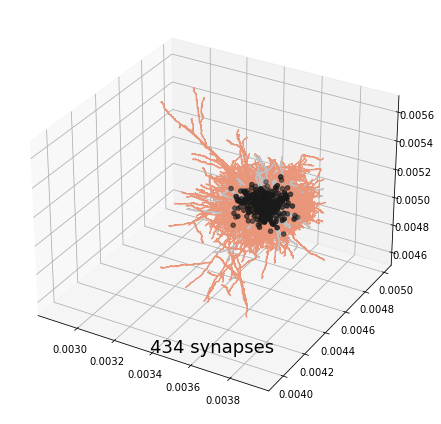

In [7]:
from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()

Following the assembly of the circuit, we set up the neuromodulatory transient which will be played through the network. Here, we simulate a dopamine transient which starts after 700 ms in the shape of an alpha function with time constant 300 ms and maximum modulation 1 (i.e 100%). We then have to add the names of the ion channels which are modulated by dSPN, iSPN and FSN. The control simulation uses a bath application with modulation level at 0. 

In [8]:
from snudda.neuromodulation.modulation_network import Neuromodulation

nl = Neuromodulation()
nl.set_timestep(dt=0.025)
nl.set_modulation(neurotransmitter = 'dopamine', neurotransmitter_key = 'DA')
nl.transient(neurotransmitter='dopamine',\
             method='alpha',\
             duration= 3000,\
             parameters={"tstart" : 700, "gmax" : 1, "tau" : 300})


nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'dSPN',\
                          section = 'soma',\
                          ion_channels = ["cal12_ms","cal13_ms","kir_ms","kas_ms","naf_ms","can_ms"])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'dSPN',\
                          section = 'dendrite',\
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","cal12_ms","cal13_ms"])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'dSPN',\
                          section = 'axon',\
                          ion_channels = [])

nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'iSPN',\
                          section = 'soma',\
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'iSPN',\
                          section = 'dendrite',\
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'iSPN',\
                          section = 'axon',\
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])

nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'FS',\
                          section = 'soma',\
                          ion_channels = ['kir_fs','kas_fs','kaf_fs','naf_fs'])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'FS',\
                          section = 'dendrite',\
                          ion_channels = ['kir_fs'])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'FS',\
                          section = 'axon',\
                          ion_channels = [])


nl.save(dir_path='data/modulation',name='dopamine_modulation.json')

In [9]:
from snudda.neuromodulation.modulation_network import Neuromodulation

nl = Neuromodulation()
nl.set_timestep(dt=0.025)
nl.set_modulation(neurotransmitter = 'dopamine', neurotransmitter_key = 'DA')
nl.transient(neurotransmitter='dopamine',\
             method='bath_application',\
             duration= 3000,\
             parameters={"gmax" : 0})


nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'dSPN',\
                          section = 'soma',\
                          ion_channels = ["cal12_ms","cal13_ms","kir_ms","kas_ms","naf_ms","can_ms"])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'dSPN',\
                          section = 'dendrite',\
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","cal12_ms","cal13_ms"])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'dSPN',\
                          section = 'axon',\
                          ion_channels = [])

nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'iSPN',\
                          section = 'soma',\
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'iSPN',\
                          section = 'dendrite',\
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'iSPN',\
                          section = 'axon',\
                          ion_channels = ["kir_ms","kas_ms","kaf_ms","naf_ms","cal12_ms","cal13_ms", "can_ms","car_ms"])

nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'FS',\
                          section = 'soma',\
                          ion_channels = ['kir_fs','kas_fs','kaf_fs','naf_fs'])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'FS',\
                          section = 'dendrite',\
                          ion_channels = ['kir_fs'])
nl.ion_channel_modulation(neurotransmitter = 'dopamine',\
                          cell_type = 'FS',\
                          section = 'axon',\
                          ion_channels = [])


nl.save(dir_path='data/modulation',name='dopamine_control.json')

Compile the mechanisms used in the simulation

In [10]:
!nrnivmodl mechanisms-modulation/

/home/jofrony/Documents/Repositories/BasalGangliaPublications/Neuromodulation-software/examples
ls: cannot access 'mechanisms-modulation//*.inc': No such file or directory
mechanisms-modulation//bk_fs.mod mechanisms-modulation//bk_ms.mod mechanisms-modulation//cadyn_fs.mod mechanisms-modulation//cadyn_ms.mod mechanisms-modulation//cal12_ms.mod mechanisms-modulation//cal13_ms.mod mechanisms-modulation//caldyn_ms.mod mechanisms-modulation//can_fs.mod mechanisms-modulation//can_ms.mod mechanisms-modulation//caq_fs.mod mechanisms-modulation//caq_ms.mod mechanisms-modulation//car_fs.mod mechanisms-modulation//car_ms.mod mechanisms-modulation//cat32_ms.mod mechanisms-modulation//cat33_ms.mod mechanisms-modulation//concACh.mod mechanisms-modulation//concDA.mod mechanisms-modulation//Im_ms.mod mechanisms-modulation//kaf_fs.mod mechanisms-modulation//kaf_ms.mod mechanisms-modulation//kas_fs.mod mechanisms-modulation//kas_ms.mod mechanisms-modulation//kdr_fs.mod mechanisms-modulation//kdr_ms.mod

Restart the kernel (if the assembly and generation of input and simulation are in different notebooks - THIS STEP IS NOT NEEDED)

In [11]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [12]:
import os
from snudda.input import SnuddaInput

os.environ["SNUDDA_DATA"] = 'data'

network_path = 'dopamine-trial-network'

si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("data","external_input","external-input-trial.json"),
                 verbose=False)
si.generate()

Loading 21 neurons with 434 synapses and 0 gap junctions
Writing spikes to dopamine-trial-network/input-spikes.hdf5


We then simulate the dopamine and control case using Snudda

In [13]:
!mpiexec -n 4 snudda simulate dopamine-trial-network --time 3.0 --outputFile 'dopamine-trial-network/simulation/network-voltage-DA-trial.hdf5' --neuromodulation data/modulation/dopamine_modulation.json

numprocs=4
Namespace(action='simulate', disable_gj=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/dopamine_modulation.json', output_file='dopamine-trial-network/simulation/network-voltage-DA-trial.hdf5', path='dopamine-trial-network', profile=False, randomseed=None, record_all=None, record_volt=True, time=3.0, verbose=False)
Creating missing directory dopamine-trial-network/simulation
Namespace(action='simulate', disable_gj=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/dopamine_modulation.json', output_file='dopamine-trial-network/simulation/network-voltage-DA-trial.hdf5', path='dopamine-trial-network', profile=False, randomseed=None, record_all=None, record_volt=True, time=3.0, verbose=False)
Namespace(action='simulate', disable_gj=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/dopam

In [14]:
!mpiexec -n 4 snudda simulate dopamine-trial-network --time 3.0 --outputFile 'dopamine-trial-network/simulation/network-voltage-DA-trial-control.hdf5' --neuromodulation data/modulation/dopamine_control.json

numprocs=4
Namespace(action='simulate', disable_gj=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/dopamine_control.json', output_file='dopamine-trial-network/simulation/network-voltage-DA-trial-control.hdf5', path='dopamine-trial-network', profile=False, randomseed=None, record_all=None, record_volt=True, time=3.0, verbose=False)
Using input file dopamine-trial-network/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
Namespace(action='simulate', disable_gj=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/dopamine_control.json', output_file='dopamine-trial-network/simulation/network-voltage-DA-trial-control.hdf5', path='dopamine-trial-network', profile=False, randomseed=None, record_all=None, re

Following the simulation, we plot the simulations individually using code from snudda. First, the dopamine modulated simulation

Loading network info from dopamine-trial-network/network-synapses.hdf5
Loading 21 neurons with 434 synapses and 0 gap junctions
Loading input info from dopamine-trial-network/input-spikes.hdf5
Loading dopamine-trial-network/simulation/network-voltage-DA-trial.hdf5
!!! Excluding first 0 s from the plot
Plotting traces: [0, 1, 2, 3, 4, 5, 10, 12, 14, 17]
Plotted 10 traces (total 21)
Saving to figure Network-voltage-trace-5-dSPN-colour.pdf


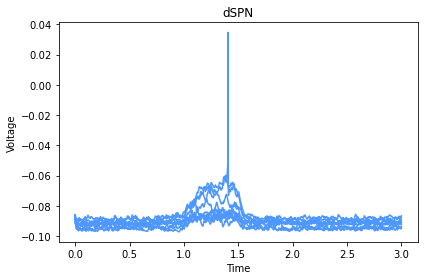

!!! Excluding first 0 s from the plot
Plotting traces: [6, 8, 9, 11, 13, 15, 16, 18, 19, 20]
Plotted 10 traces (total 21)
Saving to figure Network-voltage-trace-5-iSPN-colour.pdf


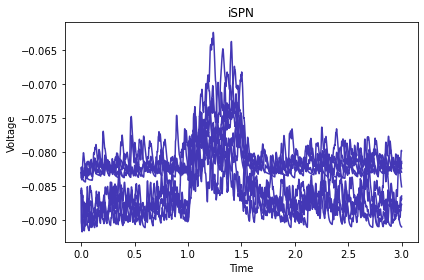

!!! Excluding first 0 s from the plot
Plotting traces: [7]
Plotted 1 traces (total 21)
Saving to figure Network-voltage-trace-5-FSN-colour.pdf


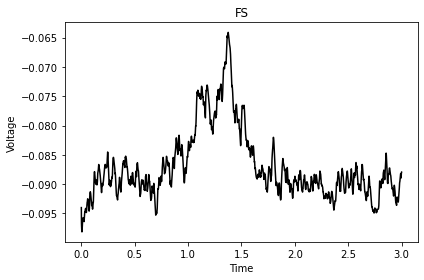

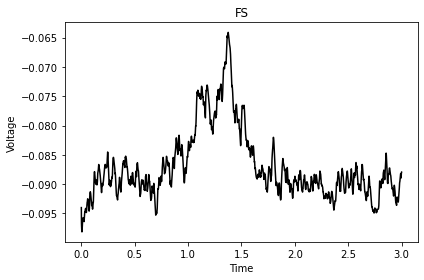

In [15]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = 'dopamine-trial-network'
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-trial.hdf5")

pl = PlotTraces(output_file=volt_file_name,network_file=network_file)

pl.plot_trace_neuron_type(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="FSN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


Second, we plot the control simulation. 

Loading network info from dopamine-trial-network/network-synapses.hdf5
Loading 21 neurons with 434 synapses and 0 gap junctions
Loading input info from dopamine-trial-network/input-spikes.hdf5
Loading dopamine-trial-network/simulation/network-voltage-DA-trial-control.hdf5
!!! Excluding first 0 s from the plot
Plotting traces: [0, 1, 2, 3, 4, 5, 10, 12, 14, 17]
Plotted 10 traces (total 21)
Saving to figure Network-voltage-trace-5-dSPN-colour.pdf


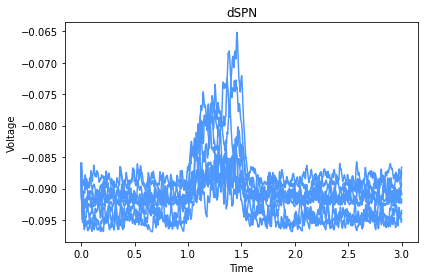

!!! Excluding first 0 s from the plot
Plotting traces: [6, 8, 9, 11, 13, 15, 16, 18, 19, 20]
Plotted 10 traces (total 21)
Saving to figure Network-voltage-trace-5-iSPN-colour.pdf


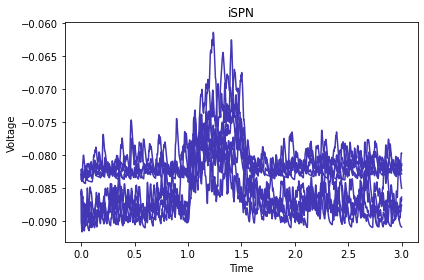

!!! Excluding first 0 s from the plot
Plotting traces: [7]
Plotted 1 traces (total 21)
Saving to figure Network-voltage-trace-5-FSN-colour.pdf


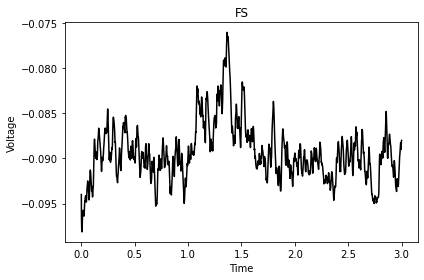

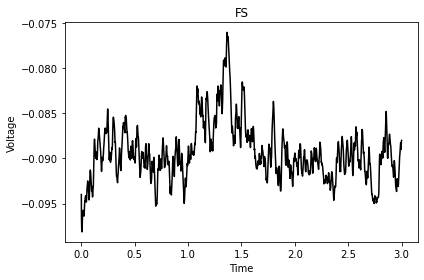

In [16]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = 'dopamine-trial-network'
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-trial-control.hdf5")

pl = PlotTraces(output_file=volt_file_name,network_file=network_file)

pl.plot_trace_neuron_type(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="FSN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


We need load and plot control (black) and dopamine modulated (red). We see clear effect on dSPN, which should depolarise upon dopamine modulation, while iSPN do not have a clear effect (although this is expected as the experimental data from single cells do not show a large effect). FS have quite a large response to dopamine modulation, which is also seen in the network

In [17]:
from plot import plot_dopamine_control
from compare import compareTraces

In [18]:
fn = ['dopamine-trial-network/simulation/network-voltage-DA-trial-control.hdf5',\
     'dopamine-trial-network/simulation/network-voltage-DA-trial.hdf5']

nf = ['dopamine-trial-network/network-synapses.hdf5',\
     'dopamine-trial-network/network-synapses.hdf5']


kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels=['control', 'DA'],colours=['black','red'])

Loading dopamine-trial-network/simulation/network-voltage-DA-trial-control.hdf5
Loading dopamine-trial-network/simulation/network-voltage-DA-trial.hdf5


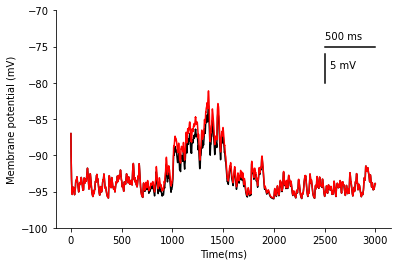

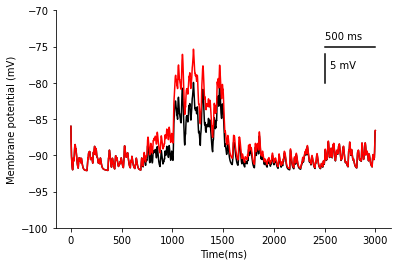

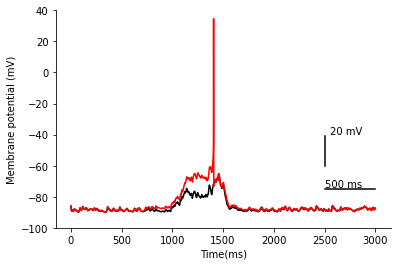

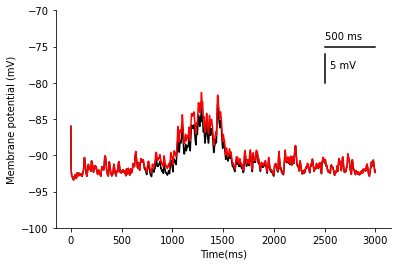

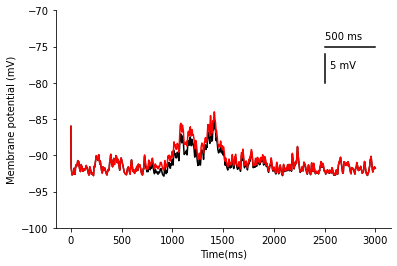

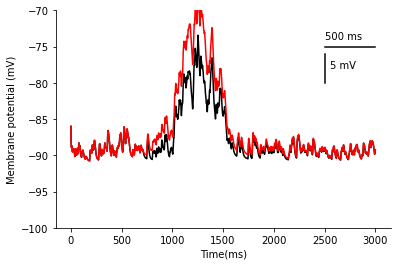

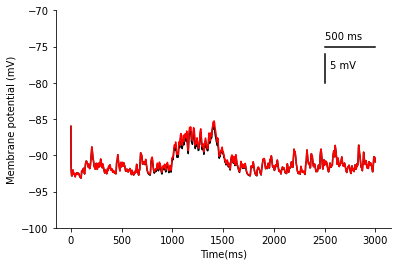

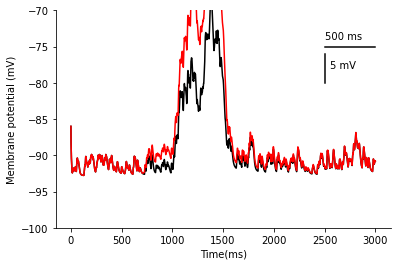

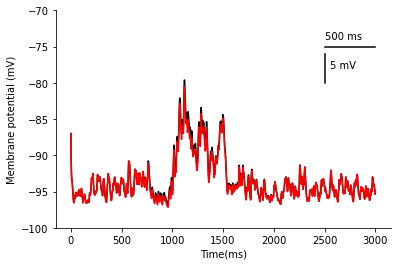

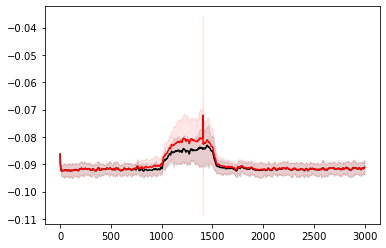

In [19]:
plot_dopamine_control(kl,type_cell='dSPN')

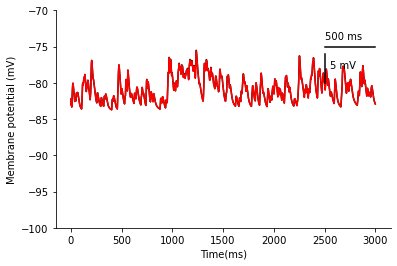

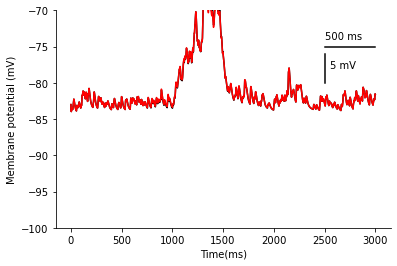

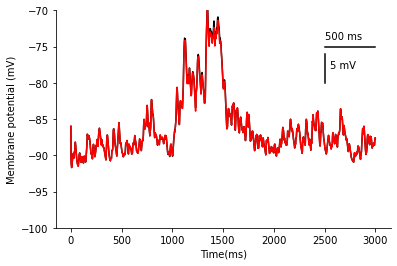

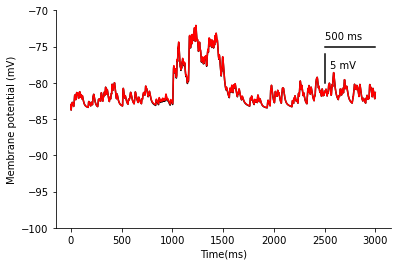

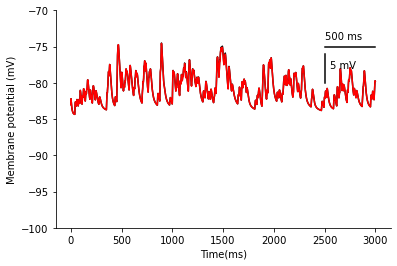

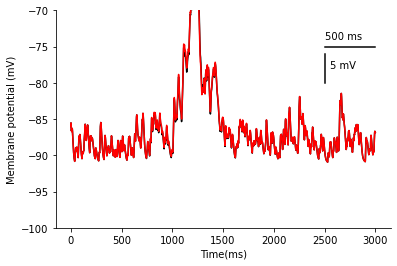

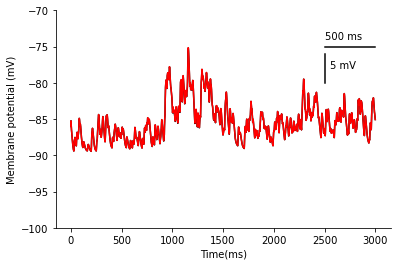

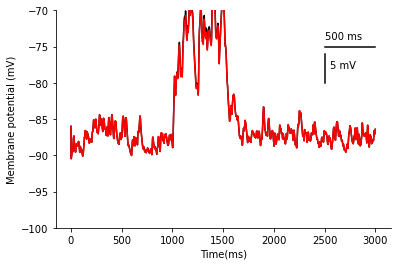

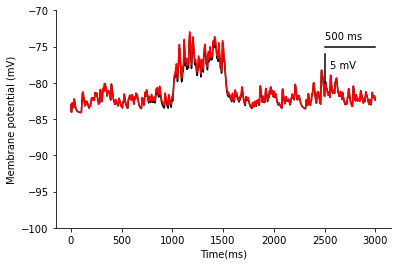

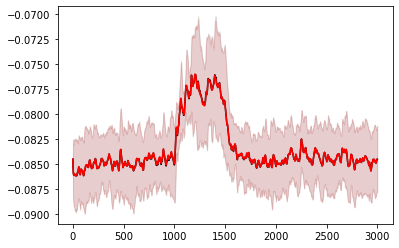

In [20]:
plot_dopamine_control(kl,type_cell='iSPN')

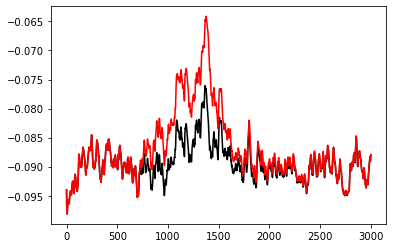

In [21]:
plot_dopamine_control(kl,type_cell='FSN')